In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

read data 

In [40]:
prices=pd.read_csv("data/raw/2020/01/2020-01-01-prices.csv")
stations=pd.read_csv("data/stations.csv")

In [6]:
prices.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
0,2020-01-01 00:00:04+01,81d72fa3-5270-45af-816f-ba0abb7776f4,1.319,1.469,1.449,1,0,0
1,2020-01-01 00:01:04+01,ec70685a-1110-4632-8735-8d2cebd07da6,1.269,1.389,1.369,1,1,1
2,2020-01-01 00:01:04+01,4de95bf1-c91c-4bf9-a0f3-9c1069dfc277,1.289,1.419,1.399,1,1,1
3,2020-01-01 00:01:04+01,9bb515a4-c551-41b8-a8a1-e120f29474fd,1.229,1.359,0.000,1,1,0
4,2020-01-01 00:01:04+01,3e385667-56a9-46b4-96de-2adcfd7b5655,1.319,1.439,1.419,1,1,1


In [30]:
len(prices)

207898

In [7]:
stations.head()

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude
0,00060723-0001-4444-8888-acdc00000001,BAGeno Raiffeisen eG,NaN,Künzelsauer Strasse,7,74653,Ingelfingen,49.296822,9.661385
1,005056ba-7cb6-1ed2-bceb-5332ab168d12,famila Tankstelle,FAMILA,Pascalstrasse,9,25442,Quickborn,53.742150,9.941240
2,005056ba-7cb6-1ed2-bceb-573c18314d16,star Tankstelle,STAR,Riehler Strasse,240,50735,Köln,50.961800,6.980070
3,005056ba-7cb6-1ed2-bceb-662ba1a94d1f,star Tankstelle,STAR,BAB 10 / Seeberg Ost,NaN,15345,Altlandsberg,52.550160,13.682120
4,005056ba-7cb6-1ed2-bceb-6f7b23564d23,star Tankstelle,STAR,Duisburger Straße,130,47166,Duisburg,51.489790,6.783730


In [22]:
len(stations.loc[(stations.city=="Hamburg")|(stations.city=="HAMBURG")])

222

set range for lattitude

In [12]:
minlat=53.553444
maxlat=53.667341

In [13]:
minlon=9.851884
maxlon=9.995315

In [31]:
#(stations.city=="Hamburg")& - 26 
# wo 51 
stations_on_route=stations.loc[
             (stations.latitude>minlat)&(stations.latitude<maxlat)&
            (stations.longitude>minlon)&(stations.longitude<maxlon)]
   

In [33]:
stations_on_route.uuid

117      64fbbee6-75a1-4999-9798-d3e81ba6a35e
119      6b9dcae3-0b93-4633-9b96-1a377c930f09
621      005056ba-7cb6-1ed2-bceb-6e6ee17d4d20
660      005056ba-7cb6-1ed2-bceb-77e71d9b6d26
771      005056ba-7cb6-1ed2-bceb-971fa39ded38
775      005056ba-7cb6-1ed2-bceb-980dcb9e8d3b
964      005056ba-7cb6-1ed4-8089-881fa56f0dda
1151     0423f1ea-3499-458f-84c8-d3047ca25c14
2169     1a1a9491-ac37-4046-9437-0d4b7a69f5e0
2264     1c29472d-908b-48cd-b163-2895e9730c3c
2464     2104a66e-b9b6-42bf-8c57-1f3e547a0b97
3055     2f0d5ed0-7935-4d5e-b623-aa20ce2ba334
3292     35b2a245-bc8f-494b-bcb9-99720738770f
4384     4fea853c-1add-4ac7-9d0a-d7c95de80ff1
4545     51d4b493-a095-1aa0-e100-80009459e03a
4566     51d4b4ae-a095-1aa0-e100-80009459e03a
4600     51d4b4dc-a095-1aa0-e100-80009459e03a
4631     51d4b504-a095-1aa0-e100-80009459e03a
5139     5336de21-fd2d-4821-b4fe-bf89684cdb81
6387     6d7517d5-2a6c-403f-bd19-f9557c5ff16c
6847     78c632ee-7674-44bc-87d7-97d155c9e2be
6868     7969d8cf-febb-42b0-8b45-2

In [34]:
prices.loc[prices.station_uuid.isin(['d0235369-10e6-4862-8b27-66c03ddace6b','bae4c2cf-1dde-4edc-b394-4da173ee9a72'])]

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
381,2020-01-01 04:02:03+01,d0235369-10e6-4862-8b27-66c03ddace6b,1.269,1.419,1.399,1,1,1
12614,2020-01-01 06:30:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.349,1.499,1.479,1,1,1
38432,2020-01-01 10:00:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.339,1.489,1.469,1,1,1
67834,2020-01-01 11:29:03+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.279,1.469,1.449,1,1,1
71549,2020-01-01 11:39:03+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.279,1.429,1.409,0,1,1
88524,2020-01-01 13:01:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.349,1.499,1.479,1,1,1
112312,2020-01-01 14:29:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.319,1.429,1.409,1,1,1
113178,2020-01-01 14:34:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.279,1.429,1.409,1,0,0
128934,2020-01-01 16:00:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.349,1.499,1.479,1,1,1
152641,2020-01-01 17:17:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.279,1.429,1.409,1,1,1


In [37]:
prices.loc[prices.station_uuid=='bae4c2cf-1dde-4edc-b394-4da173ee9a72']

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
12614,2020-01-01 06:30:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.349,1.499,1.479,1,1,1
38432,2020-01-01 10:00:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.339,1.489,1.469,1,1,1
67834,2020-01-01 11:29:03+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.279,1.469,1.449,1,1,1
71549,2020-01-01 11:39:03+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.279,1.429,1.409,0,1,1
88524,2020-01-01 13:01:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.349,1.499,1.479,1,1,1
112312,2020-01-01 14:29:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.319,1.429,1.409,1,1,1
113178,2020-01-01 14:34:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.279,1.429,1.409,1,0,0
128934,2020-01-01 16:00:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.349,1.499,1.479,1,1,1
152641,2020-01-01 17:17:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.279,1.429,1.409,1,1,1
174742,2020-01-01 18:54:04+01,bae4c2cf-1dde-4edc-b394-4da173ee9a72,1.279,1.419,1.399,0,1,1


In [55]:
stations_on_route

,uuid,name,brand,street,house_number,post_code,city,latitude,longitude
117,64fbbee6-75a1-4999-9798-d3e81ba6a35e,"HAMBURG, FRUCHTALLEE",Shell,FRUCHTALLEE 95,NaN,20259,HAMBURG,53.570618,9.953872
119,6b9dcae3-0b93-4633-9b96-1a377c930f09,"HAMBURG, PAUL-SORGE-STR.",Shell,PAUL-SORGE-STR. 150,NaN,22455,HAMBURG,53.635089,9.952902
621,005056ba-7cb6-1ed2-bceb-6e6ee17d4d20,star Tankstelle,STAR,Kieler Straße,206,22525,Hamburg,53.577040,9.937720
660,005056ba-7cb6-1ed2-bceb-77e71d9b6d26,star Tankstelle,STAR,Pinneberger Chaussee,74,22523,Hamburg,53.614860,9.893340
771,005056ba-7cb6-1ed2-bceb-971fa39ded38,star Tankstelle,STAR,Luruper Chaussee,18-22,22761,Hamburg,53.572900,9.894650
775,005056ba-7cb6-1ed2-bceb-980dcb9e8d3b,star Tankstelle,STAR,Farnhornweg,46a,22547,Hamburg,53.593220,9.890530
964,005056ba-7cb6-1ed4-8089-881fa56f0dda,star Tankstelle,STAR,Holsteiner Chaussee,182 - 184,22457,Hamburg,53.624820,9.909542
1151,0423f1ea-3499-458f-84c8-d3047ca25c14,bft Tankstelle,bft,Osdorfer Landstr.,5,22607,Hamburg,53.570060,9.875960
2169,1a1a9491-ac37-4046-9437-0d4b7a69f5e0,HMH Autoreparatur GmbH Pink-Tank,Pink-Tank,Vizelinstr.,64,22529,Hamburg,53.589740,9.947880
2264,1c29472d-908b-48cd-b163-2895e9730c3c,Esso Tankstelle,ESSO,THEODORSTR. 1,,22761,HAMBURG,53.566004,9.897019


In [41]:
#len 723
selected_prices = prices.loc[prices.station_uuid.isin(stations_on_route.uuid)]

In [42]:
selected_prices.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change
381,2020-01-01 04:02:03+01,d0235369-10e6-4862-8b27-66c03ddace6b,1.269,1.419,1.399,1,1,1
782,2020-01-01 04:36:04+01,51d4b493-a095-1aa0-e100-80009459e03a,1.319,1.469,1.449,1,1,1
788,2020-01-01 04:36:04+01,51d4b66a-a095-1aa0-e100-80009459e03a,1.319,1.469,1.449,1,1,1
886,2020-01-01 04:36:04+01,51d4b504-a095-1aa0-e100-80009459e03a,1.319,1.469,1.449,1,1,1
1005,2020-01-01 04:36:04+01,51d4b4ae-a095-1aa0-e100-80009459e03a,1.339,1.469,1.449,1,1,1


In [91]:
#warning
#selected_prices['station_name']=selected_prices.station_uuid.copy()
#selected_prices['station_name']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['brand'].to_dict()).copy()
#selected_prices['station_name'] = selected_prices['station_uuid'].map(name_dict)

In [127]:
#clean no warning version!
#selected_prices.loc[:,'station_name'] = selected_prices['station_uuid'].map(name_dict) 

extend station id to meaningful info

In [138]:
selected_prices.loc[:,'station_name']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['brand'].to_dict())
selected_prices.loc[:,'station_address']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['street'].to_dict())
selected_prices.loc[:,'station_latitude']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['latitude'].to_dict())
selected_prices.loc[:,'station_longitude']=selected_prices.station_uuid.map(stations_on_route.set_index('uuid')['longitude'].to_dict())



In [137]:
selected_prices.loc[:,'station_name']=selected_prices.station_uuid

In [133]:
#selected_prices.drop(['station_name','station_address','station_latitude','station_longitude'], axis=1,inplace=True)
#selected_prices.drop(['station_name'], axis=1,inplace=True)

In [139]:
selected_prices.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change,station_name,station_address,station_latitude,station_longitude
381,2020-01-01 04:02:03+01,d0235369-10e6-4862-8b27-66c03ddace6b,1.269,1.419,1.399,1,1,1,Mr. Wash Autoservice AG,Stresemannstraße,53.56424,9.92370
782,2020-01-01 04:36:04+01,51d4b493-a095-1aa0-e100-80009459e03a,1.319,1.469,1.449,1,1,1,JET,RUGENBARG 83,53.57960,9.85293
788,2020-01-01 04:36:04+01,51d4b66a-a095-1aa0-e100-80009459e03a,1.319,1.469,1.449,1,1,1,JET,RUGENBARG 266-268,53.58730,9.87457
886,2020-01-01 04:36:04+01,51d4b504-a095-1aa0-e100-80009459e03a,1.319,1.469,1.449,1,1,1,JET,OSDORFER LANDSTR. 170-172,53.57233,9.85420
1005,2020-01-01 04:36:04+01,51d4b4ae-a095-1aa0-e100-80009459e03a,1.339,1.469,1.449,1,1,1,JET,NEUER KAMP 31,53.55710,9.96743


In [ ]:
def station_info():
    
    return tags['tagValue'].loc[tags['tagID']==tagID].values[0]

In [136]:
selected_prices.to_csv("data/processed/2020/01/2020-01-01-prices.csv")

In [163]:
l_d = selected_prices.date[:5].values

In [172]:
from datetime import datetime

datetime_object = datetime.strptime('2020-01-01 04:02:03+01', '%Y-%m-%d %H:%M:%S+01')
#selected_prices.date
#= pd.to_datetime(selected_prices.date, format='%Y-%m-%d %H:%M:%S+1')
print(datetime_object)

2020-01-01 04:02:03


In [173]:
datetime_object

datetime.datetime(2020, 1, 1, 4, 2, 3)

In [168]:
def dt_conv(l_d):
    for i in l_d:
        datetime_object = datetime.strptime(i, '%Y-%m-%d %H:%M:%S+01')
        print(datetime_object)

In [169]:
dt_conv(l_d)

2020-01-01 04:02:03
2020-01-01 04:36:04
2020-01-01 04:36:04
2020-01-01 04:36:04
2020-01-01 04:36:04


In [170]:
datetime_object

datetime.datetime(2020, 1, 1, 4, 2, 3)

In [171]:
#selected_prices.loc[:,'dt']=
selected_prices.date.applymap(dt_conv)

AttributeError: 'Series' object has no attribute 'applymap'

In [178]:
df=selected_prices.loc[selected_prices.station_uuid=="51d4b493-a095-1aa0-e100-80009459e03a"]
#plot(figsize = (12,6))

In [180]:
df.head()

,date,station_uuid,diesel,e5,e10,dieselchange,e5change,e10change,station_name,station_address,station_latitude,station_longitude
782,2020-01-01 04:36:04+01,51d4b493-a095-1aa0-e100-80009459e03a,1.319,1.469,1.449,1,1,1,JET,RUGENBARG 83,53.5796,9.85293
13136,2020-01-01 06:33:03+01,51d4b493-a095-1aa0-e100-80009459e03a,1.399,1.519,1.499,1,1,1,JET,RUGENBARG 83,53.5796,9.85293
18289,2020-01-01 07:07:03+01,51d4b493-a095-1aa0-e100-80009459e03a,1.369,1.519,1.499,1,0,0,JET,RUGENBARG 83,53.5796,9.85293
19876,2020-01-01 07:23:03+01,51d4b493-a095-1aa0-e100-80009459e03a,1.339,1.489,1.469,1,1,1,JET,RUGENBARG 83,53.5796,9.85293
47895,2020-01-01 10:21:04+01,51d4b493-a095-1aa0-e100-80009459e03a,1.379,1.519,1.499,1,1,1,JET,RUGENBARG 83,53.5796,9.85293


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 <a list of 13 Text xticklabel objects>)

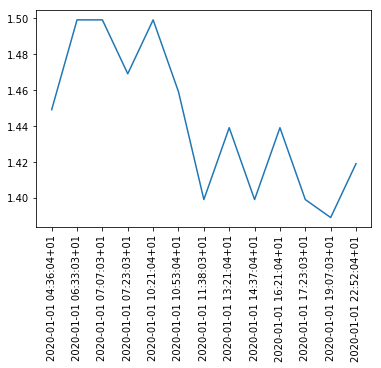

In [181]:
df = df.sort_values('date', ascending=True)
plt.plot(df['date'], df['e10'])
plt.xticks(rotation='vertical')